# Projet 9 - Produisez une étude de marché avec R ou Python - 2ème partie

## Sommaire

### Étape 3 - Clustering

In [1]:
import numpy as np #On importe les bibliothèques correspondantes ainsi que le module Re
import pandas as pd
import seaborn as sns
import re
import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt
import math as mth
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection
from sklearn.preprocessing import scale


In [2]:
df4 = pd.read_csv("df_simple3.csv") #on reprend l'analyse à partir du df global
df4.head()

,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
0,Albanie,13498.138167,2866376,0.370516,2.66,9.48,162.0,0.139784,0.394422,27000.0,0.600000,5331.751
1,Algérie,11908.537607,42228415,-0.836120,2.45,6.76,104.0,0.000095,0.001460,286000.0,0.036364,4456.797
2,Angola,7148.933253,30809787,-0.335692,2.05,12.22,257.0,1.337796,0.000946,376000.0,0.068351,21646.820
3,Azerbaïdjan,14549.061897,9939771,-0.706760,2.72,13.87,1113.0,0.134365,0.004789,138000.0,0.806522,12693.345
4,Argentine,23290.675739,44494502,0.010891,2.89,44.25,5175.0,0.050025,1.004268,1963000.0,0.263627,36815.230


In [3]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Pays (FR)                                                                                   167 non-null    object 
 1   PIB PPA $ internationaux courants par habitant (2018)                                       167 non-null    float64
 2   Population Totale (2018)                                                                    167 non-null    int64  
 3   Stabilité Politique (2018)                                                                  167 non-null    float64
 4   Indice de performance logistique - performance globale (2018)                               167 non-null    float64
 5   Disponibilité alimentaire en quantité (kg p

### Classification Ascendante Hiérarchique


#### Classification Ascendante Hiérarchique sur les 4 premières composantes

In [4]:
#On calcule les coordonnées des individus sur les composantes pour ensuite les utiliser sur la CAH

from sklearn.preprocessing import scale
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import scale

df_exclu = df4.copy()
df_exclu2 = df_exclu.drop(columns = ["Pays (FR)"])
pca = PCA()
pca.fit(df_exclu2)
df_exclu_pca = pca.transform(df_exclu2)
# Transformation en DataFrame pandas
exclu_pca_df = pd.DataFrame({
    "F1" : df_exclu_pca[:,0], 
    "F2" : df_exclu_pca[:,1],
    "F3" : df_exclu_pca[:,2], 
    "F4" : df_exclu_pca[:,3],
    "Country" : df_exclu["Pays (FR)"]
    })

# Résultat (premières lignes)
exclu_pca_df.head()

,F1,F2,F3,F4,Country
0,-2.145524e+07,70369.181950,-7751.109709,-4432.700190,Albanie
1,1.790037e+07,-686709.371527,-15039.935682,-816.486170,Algérie
2,6.487869e+06,-302031.766019,-14587.519217,-11448.144870,Angola
3,-1.438134e+07,-1234.144960,-8384.015765,-4606.437447,Azerbaïdjan
4,2.020899e+07,931287.547347,-14621.909657,-4552.359582,Argentine


In [5]:
#On prépare les données en mettant 'Country' en index

exclu_pca_df_cah = exclu_pca_df.copy()
exclu_pca_df_cah.set_index('Country', inplace=True)
X = exclu_pca_df_cah.copy()
print(X.head())
print("--------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------")
print(X.tail())

                       F1             F2            F3            F4
Country                                                             
Albanie     -2.145524e+07   70369.181950  -7751.109709  -4432.700190
Algérie      1.790037e+07 -686709.371527 -15039.935682   -816.486170
Angola       6.487869e+06 -302031.766019 -14587.519217 -11448.144870
Azerbaïdjan -1.438134e+07   -1234.144960  -8384.015765  -4606.437447
Argentine    2.020899e+07  931287.547347 -14621.909657  -4552.359582
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                        F1             F2            F3            F4
Country                                                              
Burkina Faso -4.575362e+06 -349512.637000 -12439.0814

In [6]:
#On met les données en centrée-réduite comme pour l'ACP
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [7]:
#Nous allons calculer les distances en spécifiant la méthode à utiliser

Z = linkage(X_scaled, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,50.0,115.0,0.005311,2.0
1,149.0,167.0,0.011337,3.0
2,11.0,130.0,0.015848,2.0
3,19.0,58.0,0.016646,2.0
4,54.0,124.0,0.018446,2.0
...,...,...,...,...
161,319.0,326.0,8.419503,52.0
162,327.0,328.0,14.757204,159.0
163,315.0,329.0,15.594989,163.0
164,325.0,330.0,16.627810,165.0


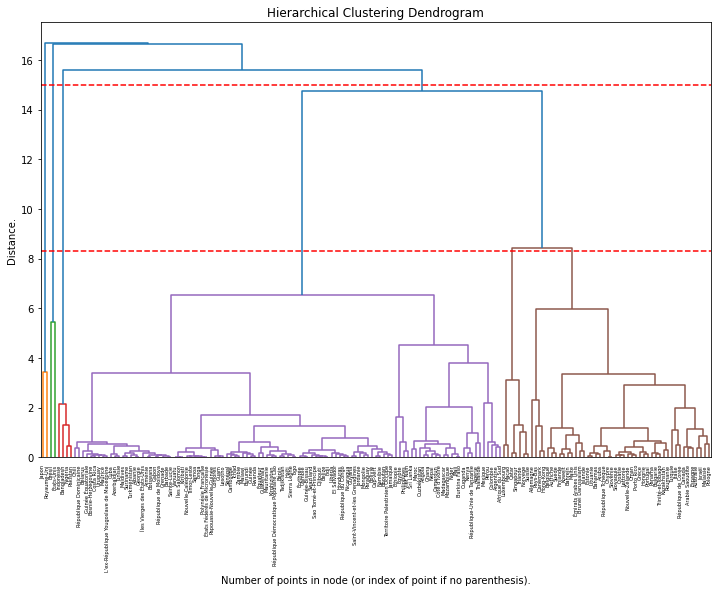

In [8]:
#On affiche le dendrogramme

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, labels = exclu_pca_df_cah.index, ax=ax)

plt.axhline(y=15.0, color='r', linestyle='--')
plt.axhline(y=8.3, color='r', linestyle='--')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

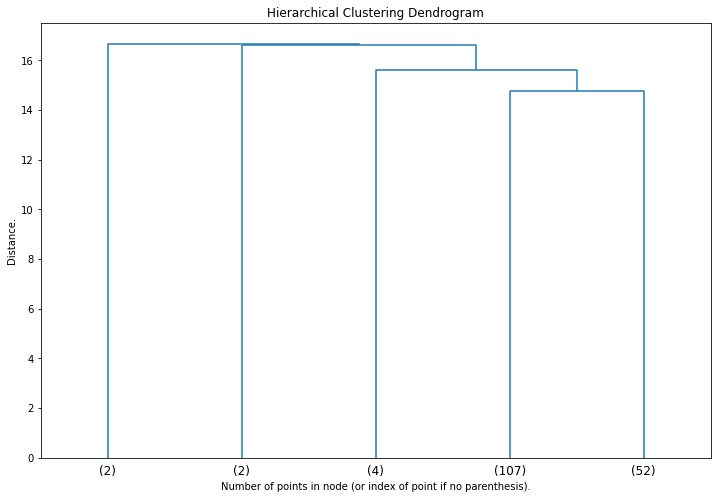

In [9]:
#Les arguments p=5, truncate_mode="lastp" signifient que l'on ne va afficher que 6 clusters

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

In [10]:
# retrieve elements in each cluster

label = fcluster(Z, 5, criterion='maxclust')

df_clst = pd.DataFrame()
df_clst['index']  = exclu_pca_df_cah.index
df_clst['label']  = label

# print them
for i in range(5):
   elements = df_clst[df_clst['label']==i+1]['index'].tolist()  
   size = len(elements)
   print('\n Cluster {}: N = {}  {}'.format(i+1, size, elements))


 Cluster 1: N = 2  ['Japon', 'Royaume-Uni']

 Cluster 2: N = 2  ['Brésil', 'États-Unis']

 Cluster 3: N = 4  ['Bangladesh', 'Indonésie', 'Nigéria', 'Pakistan']

 Cluster 4: N = 107  ['Albanie', 'Algérie', 'Angola', 'Azerbaïdjan', 'Argentine', 'Arménie', 'Barbade', 'Bhoutan', 'Bolivie', 'Bosnie-Herzégovine', 'Botswana', 'Belize', 'Îles Salomon', 'Burundi', 'Bélarus', 'Cambodge', 'Cameroun', 'Cap-vert', 'Sri Lanka', 'Tchad', 'Chili', 'Colombie', 'Comores', 'République du Congo', 'Costa Rica', 'Cuba', 'Bénin', 'République Dominicaine', 'Équateur', 'El Salvador', 'Guinée Équatoriale', 'Éthiopie', 'Érythrée', 'Fidji', 'Polynésie Française', 'Djibouti', 'Gabon', 'Géorgie', 'Gambie', 'Territoire Palestinien Occupé', 'Ghana', 'Kiribati', 'Grenade', 'Guam', 'Guatemala', 'Guinée', 'Guyana', 'Haïti', 'Honduras', "Côte d'Ivoire", 'Jamaïque', 'Jordanie', 'Kenya', 'Kirghizistan', 'République Démocratique Populaire Lao', 'Lesotho', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritanie',

In [11]:
df_clst.head()

,index,label
0,Albanie,4
1,Algérie,4
2,Angola,4
3,Azerbaïdjan,4
4,Argentine,4


In [12]:
#On réinitialise l'index de X pour faciliter la fusion
X.reset_index(inplace=True)
df_final = df_clst.merge(X, left_on= 'index', right_on= 'Country')
df_final.drop(df_final.columns[[0]], axis=1, inplace=True)
df_final.rename(columns={"label":"Cluster"}, inplace=True)
df_final.head()

,Cluster,Country,F1,F2,F3,F4
0,4,Albanie,-2.145524e+07,70369.181950,-7751.109709,-4432.700190
1,4,Algérie,1.790037e+07,-686709.371527,-15039.935682,-816.486170
2,4,Angola,6.487869e+06,-302031.766019,-14587.519217,-11448.144870
3,4,Azerbaïdjan,-1.438134e+07,-1234.144960,-8384.015765,-4606.437447
4,4,Argentine,2.020899e+07,931287.547347,-14621.909657,-4552.359582


In [13]:
#On compare les clusters

df_moy1 = df_final.groupby('Cluster').mean()
df_moy1.head(6)

,F1,F2,F3,F4
Cluster,,,,
1,7.220338e+07,3.147193e+04,413352.484451,-35090.204266
2,2.441129e+08,7.519706e+06,-62511.764855,-6969.687022
3,1.849203e+08,-4.360197e+06,-44973.437245,12558.731309
4,-7.864581e+06,-5.547310e+04,-10677.551621,-12139.095700
5,-1.020776e+07,1.591164e+05,11936.737177,25630.155716


Text(0.5, 1.0, 'Heatmap sur les moyennes')

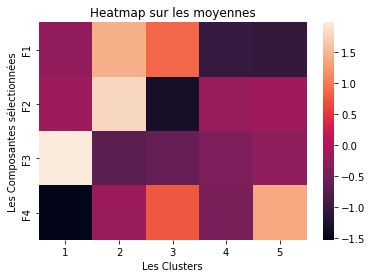

In [14]:
#Heatmap sur les clusters

#On centre et réduit les données
df_std_scale = preprocessing.StandardScaler().fit(df_moy1)
df_scaled = df_std_scale.transform(df_moy1)
df_scaled_t = df_scaled.T
sns.heatmap(df_scaled_t, yticklabels=df_moy1.iloc[:,0:4].columns.tolist(),xticklabels=[1,2,3,4,5])
plt.xlabel("Les Clusters")
plt.ylabel("Les Composantes sélectionnées")
plt.title("Heatmap sur les moyennes")

#### Classification Ascendante Hiérarchique sur les variables

Comment choisir les variables à garder ?
Les contributions des variables dans la définition d’un axe principal donné, sont exprimées en pourcentage.

Les variables corrélées avec PC1 (i.e., Dim.1) et PC2 (i.e., Dim.2) sont les plus importantes pour expliquer la variabilité dans le jeu de données.
Les variables qui ne sont pas en corrélation avec un axe ou qui sont corrélées avec les derniers axes sont des variables à faible apport et peuvent être supprimées pour simplifier l’analyse globale.

(Source : http://www.sthda.com/french/articles/38-methodes-des-composantes-principales-dans-r-guide-pratique/73-acp-analyse-en-composantes-principales-avec-r-l-essentiel/)

In [14]:
df_simple = pd.read_csv("df_simple3.csv") #on reprend l'analyse à partir du df global
df_simple_be = df_simple.copy()
df_simple_be.head()

,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
0,Albanie,13498.138167,2866376,0.370516,2.66,9.48,162.0,0.139784,0.394422,27000.0,0.600000,5331.751
1,Algérie,11908.537607,42228415,-0.836120,2.45,6.76,104.0,0.000095,0.001460,286000.0,0.036364,4456.797
2,Angola,7148.933253,30809787,-0.335692,2.05,12.22,257.0,1.337796,0.000946,376000.0,0.068351,21646.820
3,Azerbaïdjan,14549.061897,9939771,-0.706760,2.72,13.87,1113.0,0.134365,0.004789,138000.0,0.806522,12693.345
4,Argentine,23290.675739,44494502,0.010891,2.89,44.25,5175.0,0.050025,1.004268,1963000.0,0.263627,36815.230


In [15]:
df_simple_be.set_index('Pays (FR)', inplace=True)
X = df_simple_be.copy()
print(X.head())
print("--------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------")
print(X.tail())

             PIB PPA $ internationaux courants par habitant (2018)  \
Pays (FR)                                                            
Albanie                                           13498.138167       
Algérie                                           11908.537607       
Angola                                             7148.933253       
Azerbaïdjan                                       14549.061897       
Argentine                                         23290.675739       

             Population Totale (2018)  Stabilité Politique (2018)  \
Pays (FR)                                                           
Albanie                       2866376                    0.370516   
Algérie                      42228415                   -0.836120   
Angola                       30809787                   -0.335692   
Azerbaïdjan                   9939771                   -0.706760   
Argentine                    44494502                    0.010891   

             Indice de pe

In [16]:
#On met les données en centrée-réduite comme pour l'ACP

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [17]:
#Nous allons calculer les distances en spécifiant la méthode à utiliser

Z = linkage(X_scaled, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,11.0,60.0,0.314676,2.0
1,43.0,66.0,0.323855,2.0
2,96.0,124.0,0.329942,2.0
3,44.0,154.0,0.348616,2.0
4,90.0,102.0,0.352907,2.0
...,...,...,...,...
161,320.0,323.0,14.696702,9.0
162,322.0,324.0,16.526083,65.0
163,327.0,329.0,21.269747,156.0
164,321.0,328.0,23.358245,11.0


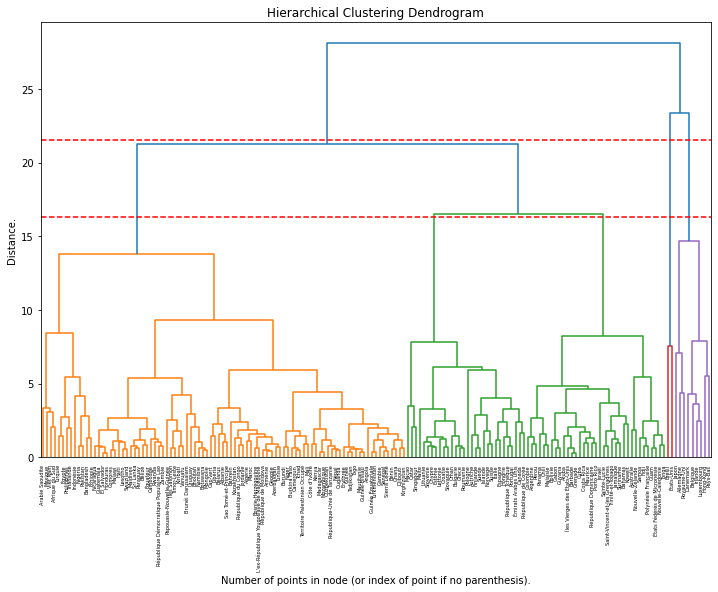

In [18]:
#On affiche le dendrogramme

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, labels = df_simple_be.index, ax=ax)

plt.axhline(y=16.3, color='r', linestyle='--')
plt.axhline(y=21.5, color='r', linestyle='--')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

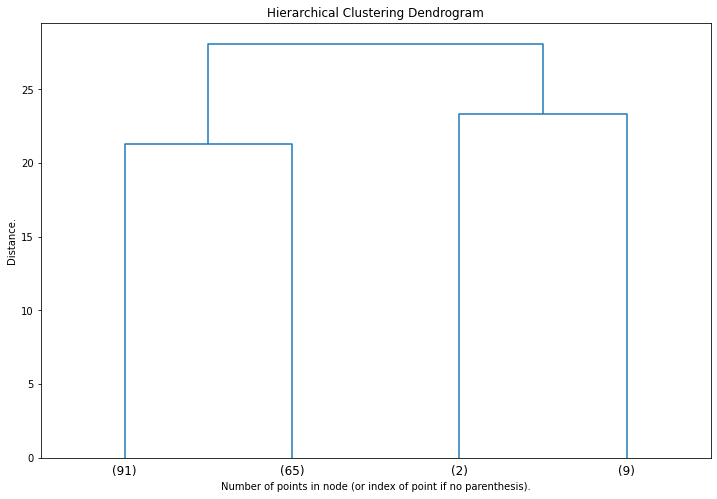

In [19]:
#Les arguments p=4, truncate_mode="lastp" signifient que l'on ne va afficher que 4 clusters

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=4, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

In [20]:
# retrieve elements in each cluster

label = fcluster(Z, 4, criterion='maxclust')

df_clst = pd.DataFrame()
df_clst['index']  = df_simple_be.index
df_clst['label']  = label

# print them
for i in range(4):
   elements = df_clst[df_clst['label']==i+1]['index'].tolist()  
   size = len(elements)
   print('\n Cluster {}: N = {}  {}'.format(i+1, size, elements))


 Cluster 1: N = 91  ['Albanie', 'Algérie', 'Angola', 'Azerbaïdjan', 'Bahreïn', 'Bangladesh', 'Arménie', 'Bhoutan', 'Bosnie-Herzégovine', 'Botswana', 'Belize', 'Îles Salomon', 'Brunéi Darussalam', 'Burundi', 'Bélarus', 'Cambodge', 'Cameroun', 'Cap-vert', 'Sri Lanka', 'Tchad', 'Comores', 'République du Congo', 'Bénin', 'Équateur', 'El Salvador', 'Guinée Équatoriale', 'Éthiopie', 'Érythrée', 'Djibouti', 'Géorgie', 'Gambie', 'Territoire Palestinien Occupé', 'Ghana', 'Kiribati', 'Guatemala', 'Guinée', 'Haïti', 'Honduras', 'Indonésie', "Côte d'Ivoire", 'Kazakhstan', 'Jordanie', 'Kenya', 'Kirghizistan', 'République Démocratique Populaire Lao', 'Lesotho', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritanie', 'Mexique', 'Mongolie', 'République de Moldova', 'Maroc', 'Mozambique', 'Namibie', 'Népal', 'Vanuatu', 'Nicaragua', 'Niger', 'Nigéria', 'Pakistan', 'Papouasie-Nouvelle-Guinée', 'Paraguay', 'Philippines', 'Guinée-Bissau', 'Timor-Leste', 'Rwanda', 'Sao Tomé-et-Principe', 'Arab

In [21]:
df_clst.head()

,index,label
0,Albanie,1
1,Algérie,1
2,Angola,1
3,Azerbaïdjan,1
4,Argentine,2


In [22]:
#On réinitialise l'index de X pour faciliter la fusion
X.reset_index(inplace=True)
df_final = df_clst.merge(X, left_on= 'index', right_on= 'Pays (FR)')
df_final.drop(df_final.columns[[0]], axis=1, inplace=True)
df_final.rename(columns={"label":"Cluster"}, inplace=True)
df_final.head()


,Cluster,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
0,1,Albanie,13498.138167,2866376,0.370516,2.66,9.48,162.0,0.139784,0.394422,27000.0,0.600000,5331.751
1,1,Algérie,11908.537607,42228415,-0.836120,2.45,6.76,104.0,0.000095,0.001460,286000.0,0.036364,4456.797
2,1,Angola,7148.933253,30809787,-0.335692,2.05,12.22,257.0,1.337796,0.000946,376000.0,0.068351,21646.820
3,1,Azerbaïdjan,14549.061897,9939771,-0.706760,2.72,13.87,1113.0,0.134365,0.004789,138000.0,0.806522,12693.345
4,2,Argentine,23290.675739,44494502,0.010891,2.89,44.25,5175.0,0.050025,1.004268,1963000.0,0.263627,36815.230


In [23]:
#On compare les clusters

df_moy1 = df_final.groupby('Cluster').mean()
df_moy1.head(6)

,PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
Cluster,,,,,,,,,,,
1,9439.353164,2.791825e+07,-0.395301,2.577473,10.684176,1097.758242,0.246200,0.086381,2.888022e+05,1.432188,21833.972754
2,34026.863879,1.016427e+07,0.632995,3.059385,34.693231,6423.269231,0.384737,0.378880,3.513231e+05,3.811581,22141.077358
3,38911.968080,2.681538e+08,-0.009503,3.440000,52.355000,24716.000000,0.549161,17.971115,1.432850e+07,0.132561,25347.412000
4,64089.480885,3.591931e+07,0.787813,3.925556,22.501111,163458.888889,3.679113,2.611178,8.287778e+05,31.133332,8472.530934


Les États-Unis et le Brésil apparaissent en cluster tout seuls ce sont des outliers, on va donc les exclure de l'analyse, mais aussi parce qu'ils sont très loin et ce ne serait ni rentable ni écologique de leur vendre du poulet.

#### Classification Ascendante Hiérarchique (sans le Brésil et les États-Unis)

In [24]:
df_simple2 = pd.read_csv("df_simple3.csv") #on reprend l'analyse à partir du df global
df_simple3 = df_simple2[(df_simple2['Pays (FR)'] != 'Brésil') & (df_simple2['Pays (FR)'] != 'États-Unis')]
df_simple3.head()

,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
0,Albanie,13498.138167,2866376,0.370516,2.66,9.48,162.0,0.139784,0.394422,27000.0,0.600000,5331.751
1,Algérie,11908.537607,42228415,-0.836120,2.45,6.76,104.0,0.000095,0.001460,286000.0,0.036364,4456.797
2,Angola,7148.933253,30809787,-0.335692,2.05,12.22,257.0,1.337796,0.000946,376000.0,0.068351,21646.820
3,Azerbaïdjan,14549.061897,9939771,-0.706760,2.72,13.87,1113.0,0.134365,0.004789,138000.0,0.806522,12693.345
4,Argentine,23290.675739,44494502,0.010891,2.89,44.25,5175.0,0.050025,1.004268,1963000.0,0.263627,36815.230


In [25]:
df_simple3.set_index('Pays (FR)', inplace=True)
X3 = df_simple3.copy()
print(X3.head())
print("--------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------")
print(X3.tail())

             PIB PPA $ internationaux courants par habitant (2018)  \
Pays (FR)                                                            
Albanie                                           13498.138167       
Algérie                                           11908.537607       
Angola                                             7148.933253       
Azerbaïdjan                                       14549.061897       
Argentine                                         23290.675739       

             Population Totale (2018)  Stabilité Politique (2018)  \
Pays (FR)                                                           
Albanie                       2866376                    0.370516   
Algérie                      42228415                   -0.836120   
Angola                       30809787                   -0.335692   
Azerbaïdjan                   9939771                   -0.706760   
Argentine                    44494502                    0.010891   

             Indice de pe

In [26]:
#On met les données en centrée-réduite comme pour l'ACP

std_scale = preprocessing.StandardScaler().fit(X3)
X_scaled = std_scale.transform(X3)

In [27]:
#Nous allons calculer les distances en spécifiant la méthode à utiliser

Z = linkage(X_scaled, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,11.0,59.0,0.318665,2.0
1,95.0,123.0,0.334869,2.0
2,42.0,65.0,0.339845,2.0
3,89.0,101.0,0.358249,2.0
4,43.0,153.0,0.358985,2.0
...,...,...,...,...
159,307.0,321.0,14.199073,6.0
160,318.0,320.0,17.318158,108.0
161,323.0,325.0,20.122844,131.0
162,322.0,326.0,21.246023,159.0


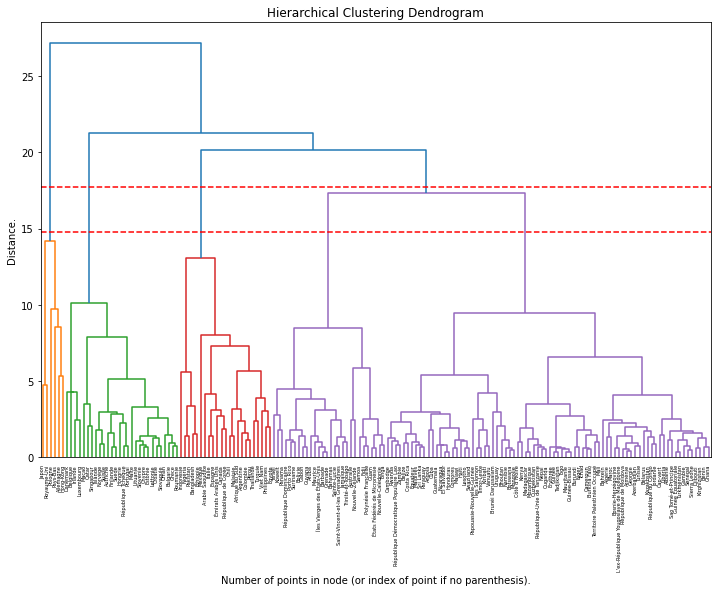

In [28]:
#On affiche le dendrogramme

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, labels = df_simple3.index, ax=ax)

plt.axhline(y=14.8, color='r', linestyle='--')
plt.axhline(y=17.7, color='r', linestyle='--')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

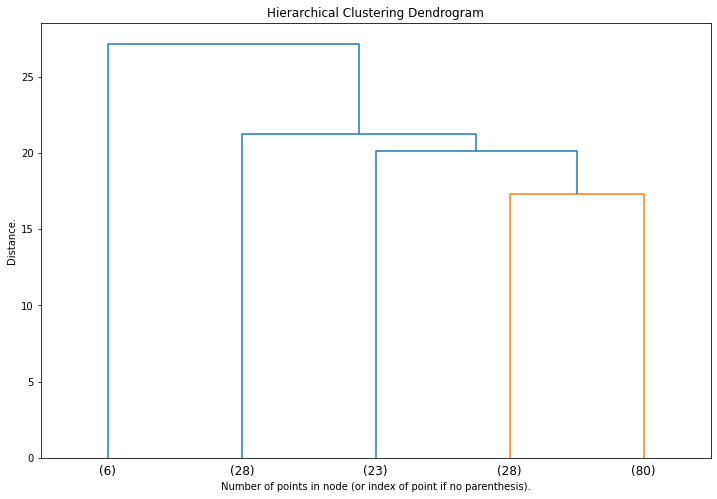

In [29]:
#Les arguments p=5, truncate_mode="lastp" signifient que l'on ne va afficher que 6 clusters

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

In [30]:
# retrieve elements in each cluster

label = fcluster(Z, 5, criterion='maxclust')

df_clst = pd.DataFrame()
df_clst['index']  = df_simple3.index
df_clst['label']  = label

# print them
for i in range(5):
   elements = df_clst[df_clst['label']==i+1]['index'].tolist()  
   size = len(elements)
   print('\n Cluster {}: N = {}  {}'.format(i+1, size, elements))


 Cluster 1: N = 6  ['Allemagne', 'Hong-Kong', 'Japon', 'Pays-Bas', 'Pologne', 'Royaume-Uni']

 Cluster 2: N = 28  ['Autriche', 'Belgique', 'Bulgarie', 'Croatie', 'Chypre', 'République Tchèque', 'Danemark', 'Estonie', 'Finlande', 'Grèce', 'Hongrie', 'Islande', 'Irlande', 'Lettonie', 'Lituanie', 'Luxembourg', 'Macao', 'Malte', 'Oman', 'Norvège', 'Portugal', 'Qatar', 'Roumanie', 'Singapour', 'Slovaquie', 'Slovénie', 'Suède', 'Suisse']

 Cluster 3: N = 23  ['Argentine', 'Bangladesh', 'Canada', 'Chili', 'Colombie', 'Éthiopie', 'Indonésie', 'Italie', 'République de Corée', 'Malaisie', 'Mexique', 'Nigéria', 'Pakistan', 'Pérou', 'Philippines', 'Arabie Saoudite', 'Viet Nam', 'Afrique du Sud', 'Espagne', 'Thaïlande', 'Émirats Arabes Unis', 'Turquie', 'Égypte']

 Cluster 4: N = 28  ['Australie', 'Bahamas', 'Barbade', 'Bolivie', 'République Dominicaine', 'Fidji', 'Polynésie Française', 'Gabon', 'Grenade', 'Guam', 'Guyana', 'Israël', 'Jamaïque', 'Koweït', 'Maurice', 'Aruba', 'Nouvelle-Calédonie', 

In [31]:
df_clst.head()

,index,label
0,Albanie,5
1,Algérie,5
2,Angola,5
3,Azerbaïdjan,5
4,Argentine,3


In [32]:
#On réinitialise l'index de X pour faciliter la fusion
X3.reset_index(inplace=True)
df_final = df_clst.merge(X3, left_on= 'index', right_on= 'Pays (FR)')
df_final.drop(df_final.columns[[0]], axis=1, inplace=True)
df_final.rename(columns={"label":"Cluster"}, inplace=True)
df_final.head()

,Cluster,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
0,5,Albanie,13498.138167,2866376,0.370516,2.66,9.48,162.0,0.139784,0.394422,27000.0,0.600000,5331.751
1,5,Algérie,11908.537607,42228415,-0.836120,2.45,6.76,104.0,0.000095,0.001460,286000.0,0.036364,4456.797
2,5,Angola,7148.933253,30809787,-0.335692,2.05,12.22,257.0,1.337796,0.000946,376000.0,0.068351,21646.820
3,5,Azerbaïdjan,14549.061897,9939771,-0.706760,2.72,13.87,1113.0,0.134365,0.004789,138000.0,0.806522,12693.345
4,3,Argentine,23290.675739,44494502,0.010891,2.89,44.25,5175.0,0.050025,1.004268,1963000.0,0.263627,36815.230


In [33]:
#On compare les clusters

df_moy = df_final.groupby('Cluster').mean()
df_moy.head(6)

,PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
Cluster,,,,,,,,,,,
1,49536.491244,5.642543e+07,0.641742,3.950000,25.185000,218026.333333,4.768498,4.846624,1.375333e+06,23.458241,12160.658567
2,53987.753932,5.805070e+06,0.855492,3.431071,22.112143,12760.785714,0.603938,0.409769,1.420714e+05,11.001483,7616.940183
3,23480.039553,8.688491e+07,-0.454312,3.132609,23.519130,8759.347826,0.990092,0.557472,1.371043e+06,0.701158,24348.714483
4,21092.657641,3.022014e+06,0.597807,2.696429,46.068571,2031.767857,0.097553,0.021266,1.588214e+05,2.250300,33069.807821
5,8850.265460,1.175560e+07,-0.272887,2.517750,10.359000,809.050000,0.118741,0.025224,1.045625e+05,1.629448,21626.262484


Les clusters 1 et 2 sont intéressants d'un point de vue business et écologique, vu que c'est celui qui a une bonne stabilité politique, un indice de performance logistique assez élevé, une disponiblité alimentaire qui a un potentiel à la hausse, importe beaucoup et d'ailleurs dépend beaucoup de ses importations en moyenne, sans oublier une population nombreuse, mais aussi des émissions de CO2 faibles par rapport aux autres clusters.

In [34]:
for i in range(5):
   elements = df_clst[df_clst['label']==i+1]['index'].tolist()  
   size = len(elements)
   print('\n Cluster {}: N = {}  {}'.format(i+1, size, elements))


 Cluster 1: N = 6  ['Allemagne', 'Hong-Kong', 'Japon', 'Pays-Bas', 'Pologne', 'Royaume-Uni']

 Cluster 2: N = 28  ['Autriche', 'Belgique', 'Bulgarie', 'Croatie', 'Chypre', 'République Tchèque', 'Danemark', 'Estonie', 'Finlande', 'Grèce', 'Hongrie', 'Islande', 'Irlande', 'Lettonie', 'Lituanie', 'Luxembourg', 'Macao', 'Malte', 'Oman', 'Norvège', 'Portugal', 'Qatar', 'Roumanie', 'Singapour', 'Slovaquie', 'Slovénie', 'Suède', 'Suisse']

 Cluster 3: N = 23  ['Argentine', 'Bangladesh', 'Canada', 'Chili', 'Colombie', 'Éthiopie', 'Indonésie', 'Italie', 'République de Corée', 'Malaisie', 'Mexique', 'Nigéria', 'Pakistan', 'Pérou', 'Philippines', 'Arabie Saoudite', 'Viet Nam', 'Afrique du Sud', 'Espagne', 'Thaïlande', 'Émirats Arabes Unis', 'Turquie', 'Égypte']

 Cluster 4: N = 28  ['Australie', 'Bahamas', 'Barbade', 'Bolivie', 'République Dominicaine', 'Fidji', 'Polynésie Française', 'Gabon', 'Grenade', 'Guam', 'Guyana', 'Israël', 'Jamaïque', 'Koweït', 'Maurice', 'Aruba', 'Nouvelle-Calédonie', 

Text(0.5, 1.0, 'Heatmap sur les moyennes')

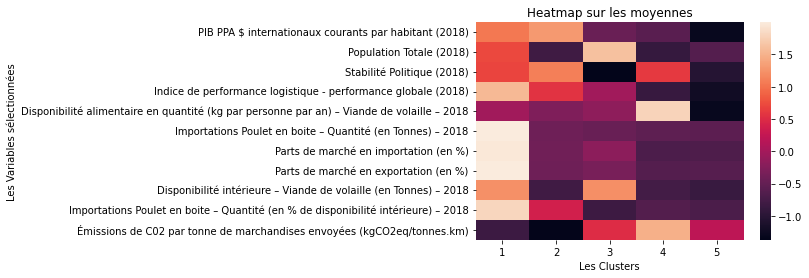

In [35]:
#Heatmap sur les clusters

#On centre et réduit les données
df_std_scale = preprocessing.StandardScaler().fit(df_moy)
df_scaled = df_std_scale.transform(df_moy)
df_scaled_t = df_scaled.T
sns.heatmap(df_scaled_t, yticklabels=df_simple3.iloc[:,0:11].columns.tolist(),xticklabels=[1,2,3,4,5])
plt.xlabel("Les Clusters")
plt.ylabel("Les Variables sélectionnées")
plt.title("Heatmap sur les moyennes")

Les clusters 1 et 2 sont intéressants.

#### Affichage des clusters sur le premier plan factoriel

In [36]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker=".",
                                markersize=None):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker, s=200)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels is not None :
        for i,(x,y) in enumerate(X_projected[:,[0,1]]):
            plt.text(x, y, labels[i], fontsize='13')

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()


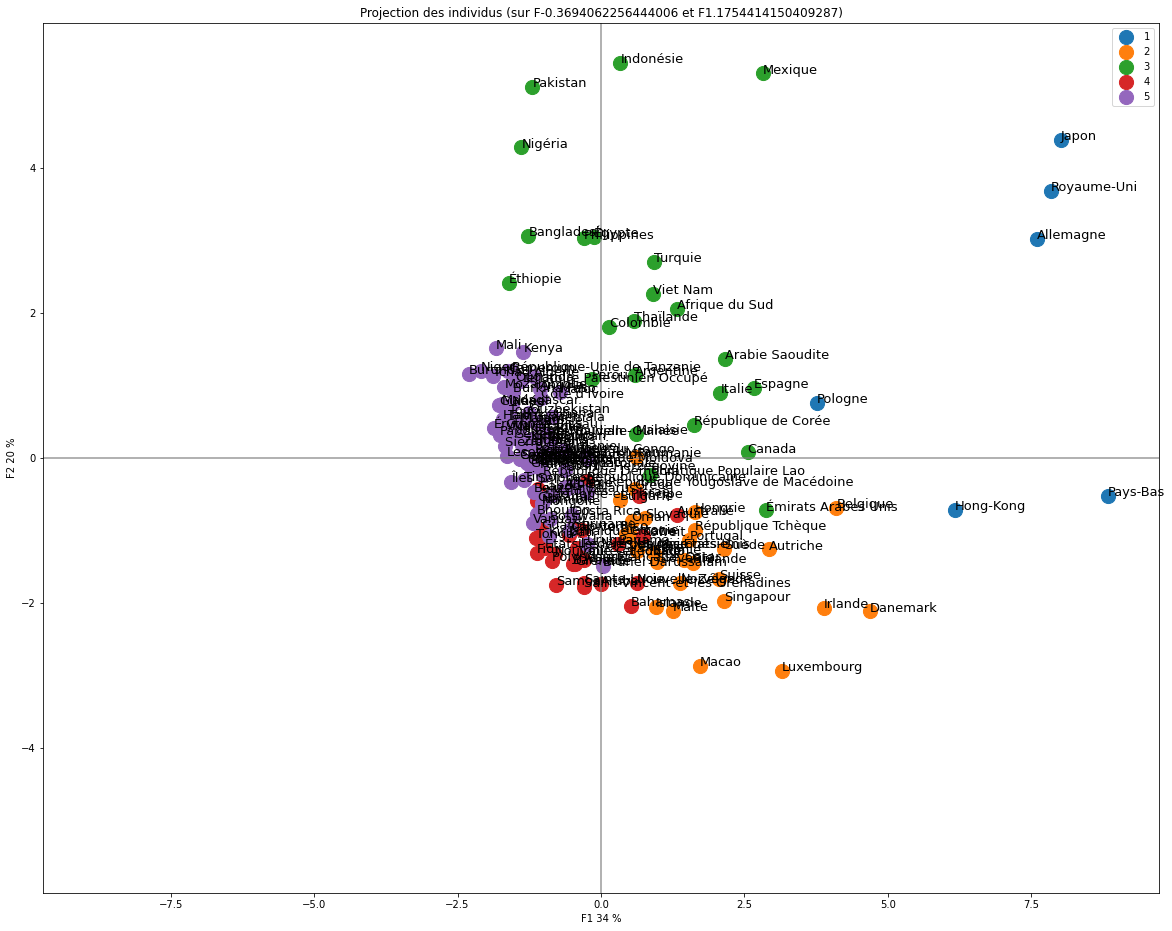

In [37]:


#On récupère les noms des pays
names = df_simple3.index
# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)


display_factorial_planes(X_reduced, [0, 1], pca, labels=names, clusters=df_final.Cluster, figsize=(20,16), marker="o")

### K-means

#### K-means sur les 4 premières composantes

C:\Users\nic_9\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


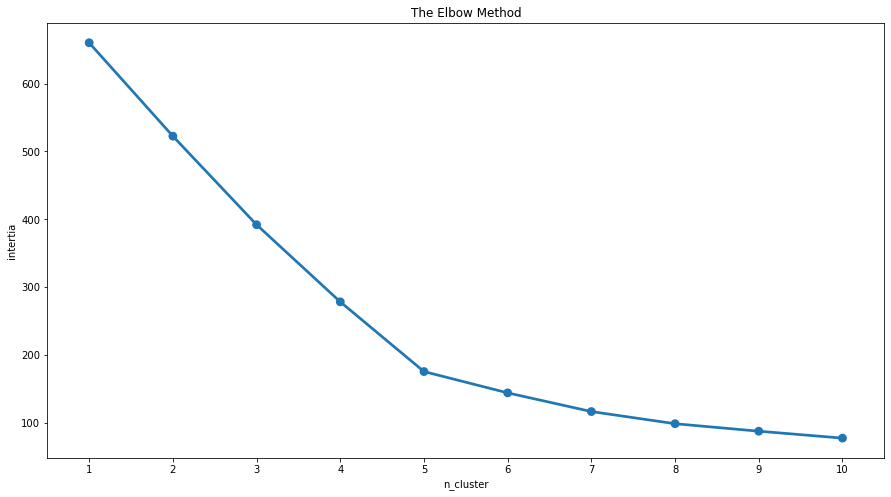

In [38]:
from sklearn.cluster import KMeans

df_exclu = df4[(df4['Pays (FR)'] != 'Brésil') & (df4['Pays (FR)'] != 'États-Unis')]
df_exclu2 = df_exclu.drop(columns = ["Pays (FR)"])
pca = PCA()
pca.fit(df_exclu2)
df_exclu_pca = pca.transform(df_exclu2)
# Transformation en DataFrame pandas
exclu_pca_df = pd.DataFrame({
    "F1" : df_exclu_pca[:,0], 
    "F2" : df_exclu_pca[:,1],
    "F3" : df_exclu_pca[:,2], 
    "F4" : df_exclu_pca[:,3],
    "Country" : df_exclu["Pays (FR)"]
})


#On prépare les données en mettant 'Country' en index

exclu_pca_df.set_index('Country', inplace=True)
X1 = exclu_pca_df.copy()

#On met les données en centrée-réduite comme pour l'ACP

std_scale = preprocessing.StandardScaler().fit(X1)
X1_scaled = std_scale.transform(X1)

#Méthode du coude 

# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X1_scaled)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
plt.figure(figsize=(15,8))
plt.title('The Elbow Method')
plt.xlabel('n_cluster'); plt.ylabel('intertia')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

plt.show()


In [39]:
#Exécution du k-means

kmeans = KMeans(n_clusters=5).fit(X1_scaled)
kmeans.labels_

array([2, 2, 2, 2, 3, 3, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 1, 1, 3, 2, 2, 4, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 0, 1, 2, 0, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       3, 2, 2, 1, 2, 3, 1, 3, 3, 2, 2, 1, 1, 2, 3, 2, 2, 2, 1, 2, 3, 2,
       2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2])

In [40]:
#On récupère les labels
cluster_map1 = pd.DataFrame()
cluster_map1['index'] = exclu_pca_df.index.values
cluster_map1['cluster'] = kmeans.labels_

for i in range(0, 5, 1):
    elements = cluster_map1[cluster_map1['cluster']==i]['index'].tolist()  
    size = len(elements)
    print('\n Cluster {}: N = {}  {}'.format(i+1, size, elements))


 Cluster 1: N = 5  ['Bangladesh', 'Éthiopie', 'Indonésie', 'Nigéria', 'Pakistan']

 Cluster 2: N = 29  ['Autriche', 'Bahreïn', 'Belgique', 'Brunéi Darussalam', 'Chypre', 'République Tchèque', 'Danemark', 'Estonie', 'Finlande', 'Allemagne', 'Hong-Kong', 'Islande', 'Irlande', 'Israël', 'Koweït', 'Lituanie', 'Luxembourg', 'Macao', 'Malte', 'Pays-Bas', 'Aruba', 'Norvège', 'Portugal', 'Qatar', 'Singapour', 'Slovénie', 'Suède', 'Suisse', 'Émirats Arabes Unis']

 Cluster 3: N = 111  ['Albanie', 'Algérie', 'Angola', 'Azerbaïdjan', 'Bahamas', 'Arménie', 'Barbade', 'Bhoutan', 'Bolivie', 'Bosnie-Herzégovine', 'Botswana', 'Belize', 'Îles Salomon', 'Bulgarie', 'Burundi', 'Bélarus', 'Cambodge', 'Cameroun', 'Cap-vert', 'Sri Lanka', 'Tchad', 'Chili', 'Comores', 'République du Congo', 'Costa Rica', 'Croatie', 'Cuba', 'Bénin', 'République Dominicaine', 'Équateur', 'El Salvador', 'Guinée Équatoriale', 'Érythrée', 'Fidji', 'Polynésie Française', 'Djibouti', 'Gabon', 'Géorgie', 'Gambie', 'Territoire Pales

In [41]:
X1.reset_index(inplace=True)
df_final15 = cluster_map1.merge(X1, left_on= 'index', right_on= 'Country')
df_final15.head()

,index,cluster,Country,F1,F2,F3,F4
0,Albanie,2,Albanie,-1.849650e+07,-1.360151e+05,-990.183119,-4056.809962
1,Algérie,2,Algérie,2.086619e+07,-2.607313e+05,-8395.694179,-617.940932
2,Angola,2,Angola,9.448981e+06,-5.960505e+04,-14083.964179,-11671.556821
3,Azerbaïdjan,2,Azerbaïdjan,-1.142236e+07,-9.396529e+04,-4114.563765,-4436.664277
4,Argentine,3,Argentine,2.314850e+07,1.393099e+06,-69937.041279,-8442.933596


In [42]:
df_final15.drop(columns =['index'], inplace=True)
df_final15.rename(columns={"cluster":"Cluster"}, inplace=True)
df_final15.head()

,Cluster,Country,F1,F2,F3,F4
0,2,Albanie,-1.849650e+07,-1.360151e+05,-990.183119,-4056.809962
1,2,Algérie,2.086619e+07,-2.607313e+05,-8395.694179,-617.940932
2,2,Angola,9.448981e+06,-5.960505e+04,-14083.964179,-11671.556821
3,2,Azerbaïdjan,-1.142236e+07,-9.396529e+04,-4114.563765,-4436.664277
4,3,Argentine,2.314850e+07,1.393099e+06,-69937.041279,-8442.933596


In [43]:
df_moy15 = df_final15.groupby('Cluster').mean()
df_moy15.head(6)

,F1,F2,F3,F4
Cluster,,,,
0,1.679103e+08,-1.224931e+06,-16939.377164,10238.401905
1,-1.337535e+07,2.211434e+04,21404.299574,36410.831641
2,-1.174990e+07,-1.176254e+05,-3503.976069,-9819.167729
3,3.901506e+07,8.805649e+05,-47548.015073,2788.338568
4,7.515069e+07,1.344796e+06,354388.906547,-33684.301688


Text(0.5, 1.0, 'Heatmap sur les moyennes')

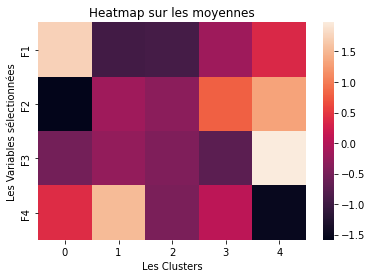

In [44]:
#Heatmap sur les clusters

#On centre et réduit les données
df_std_scale = preprocessing.StandardScaler().fit(df_moy15)
df_scaled = df_std_scale.transform(df_moy15)
df_scaled_t = df_scaled.T
sns.heatmap(df_scaled_t, yticklabels=df_moy15.iloc[:,0:4].columns.tolist(),xticklabels=[0,1,2,3,4])
plt.xlabel("Les Clusters")
plt.ylabel("Les Variables sélectionnées")
plt.title("Heatmap sur les moyennes")

#### K-means sur les variables

#### Méthode du coude pour déterminer le nombre de clusters

C:\Users\nic_9\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


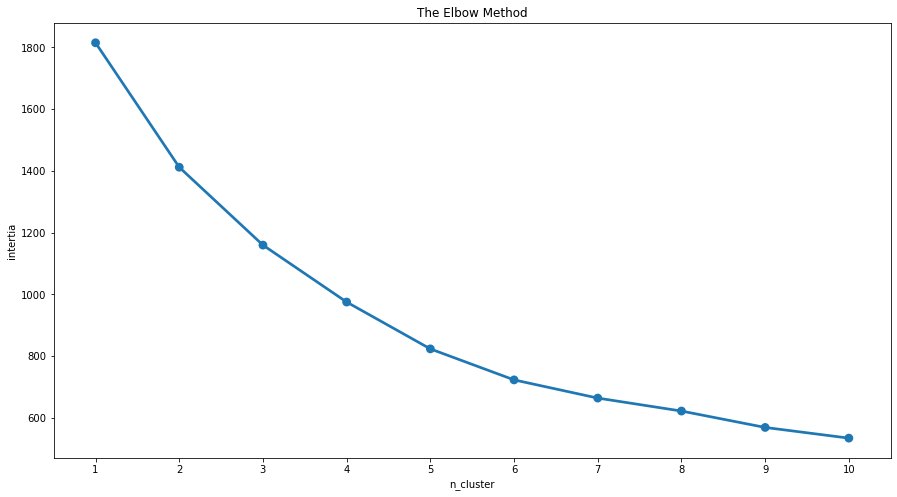

In [45]:


# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_scaled)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
plt.figure(figsize=(15,8))
plt.title('The Elbow Method')
plt.xlabel('n_cluster'); plt.ylabel('intertia')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

plt.show()

D'après la courbe, le nombre optimal de clusters est 6.

In [46]:
#Exécution du k-means

kmeans = KMeans(n_clusters=6).fit(X_scaled)
kmeans.labels_

array([1, 1, 1, 1, 5, 3, 4, 3, 1, 5, 1, 3, 0, 1, 3, 1, 1, 1, 1, 3, 4, 1,
       1, 1, 1, 4, 1, 1, 1, 3, 5, 1, 1, 3, 4, 3, 4, 4, 1, 4, 3, 1, 1, 1,
       1, 1, 4, 3, 4, 3, 1, 1, 1, 1, 1, 0, 1, 3, 4, 3, 3, 1, 1, 3, 1, 1,
       0, 4, 4, 5, 4, 3, 4, 1, 3, 2, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 4, 4,
       4, 1, 1, 3, 1, 1, 4, 1, 3, 5, 1, 1, 1, 1, 4, 1, 1, 0, 3, 3, 3, 3,
       1, 1, 5, 4, 3, 5, 3, 1, 1, 5, 5, 0, 4, 1, 1, 3, 4, 4, 1, 3, 3, 1,
       5, 1, 1, 4, 4, 5, 4, 5, 4, 3, 1, 4, 4, 1, 5, 1, 3, 3, 4, 1, 5, 1,
       1, 1, 5, 2, 1, 3, 1, 3, 1, 3, 1])

In [47]:
#On récupère les labels
cluster_map = pd.DataFrame()
cluster_map['index'] = df_simple3.index.values
cluster_map['cluster'] = kmeans.labels_

for i in range(0, 6, 1):
    elements = cluster_map[cluster_map['cluster']==i]['index'].tolist()  
    size = len(elements)
    print('\n Cluster {}: N = {}  {}'.format(i+1, size, elements))
    


 Cluster 1: N = 5  ['Belgique', 'Allemagne', 'Hong-Kong', 'Pays-Bas', 'Pologne']

 Cluster 2: N = 76  ['Albanie', 'Algérie', 'Angola', 'Azerbaïdjan', 'Bahreïn', 'Arménie', 'Bhoutan', 'Bosnie-Herzégovine', 'Botswana', 'Belize', 'Îles Salomon', 'Burundi', 'Bélarus', 'Cambodge', 'Cameroun', 'Cap-vert', 'Sri Lanka', 'Tchad', 'Comores', 'République du Congo', 'Bénin', 'Équateur', 'El Salvador', 'Guinée Équatoriale', 'Éthiopie', 'Érythrée', 'Djibouti', 'Gabon', 'Géorgie', 'Gambie', 'Territoire Palestinien Occupé', 'Ghana', 'Guatemala', 'Guinée', 'Haïti', 'Honduras', "Côte d'Ivoire", 'Kazakhstan', 'Jordanie', 'Kenya', 'Kirghizistan', 'République Démocratique Populaire Lao', 'Lesotho', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritanie', 'Mongolie', 'République de Moldova', 'Maroc', 'Mozambique', 'Namibie', 'Népal', 'Nicaragua', 'Niger', 'Papouasie-Nouvelle-Guinée', 'Paraguay', 'Guinée-Bissau', 'Timor-Leste', 'Rwanda', 'Sao Tomé-et-Principe', 'Sénégal', 'Sierra Leone', 'Swazil

In [48]:
cluster_map.head()

,index,cluster
0,Albanie,1
1,Algérie,1
2,Angola,1
3,Azerbaïdjan,1
4,Argentine,5


In [49]:
X3.reset_index(inplace=True)
X3.head()

,index,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
0,0,Albanie,13498.138167,2866376,0.370516,2.66,9.48,162.0,0.139784,0.394422,27000.0,0.600000,5331.751
1,1,Algérie,11908.537607,42228415,-0.836120,2.45,6.76,104.0,0.000095,0.001460,286000.0,0.036364,4456.797
2,2,Angola,7148.933253,30809787,-0.335692,2.05,12.22,257.0,1.337796,0.000946,376000.0,0.068351,21646.820
3,3,Azerbaïdjan,14549.061897,9939771,-0.706760,2.72,13.87,1113.0,0.134365,0.004789,138000.0,0.806522,12693.345
4,4,Argentine,23290.675739,44494502,0.010891,2.89,44.25,5175.0,0.050025,1.004268,1963000.0,0.263627,36815.230


In [50]:
df_final2 = cluster_map.merge(X3, left_on= 'index', right_on= 'Pays (FR)')
df_final2.head()


,index_x,cluster,index_y,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
0,Albanie,1,0,Albanie,13498.138167,2866376,0.370516,2.66,9.48,162.0,0.139784,0.394422,27000.0,0.600000,5331.751
1,Algérie,1,1,Algérie,11908.537607,42228415,-0.836120,2.45,6.76,104.0,0.000095,0.001460,286000.0,0.036364,4456.797
2,Angola,1,2,Angola,7148.933253,30809787,-0.335692,2.05,12.22,257.0,1.337796,0.000946,376000.0,0.068351,21646.820
3,Azerbaïdjan,1,3,Azerbaïdjan,14549.061897,9939771,-0.706760,2.72,13.87,1113.0,0.134365,0.004789,138000.0,0.806522,12693.345
4,Argentine,5,4,Argentine,23290.675739,44494502,0.010891,2.89,44.25,5175.0,0.050025,1.004268,1963000.0,0.263627,36815.230


In [51]:
df_final2.drop(columns =['index_x', 'index_y'], inplace=True)
df_final2.rename(columns={"cluster":"Cluster"}, inplace=True)
df_final2.head()

,Cluster,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
0,1,Albanie,13498.138167,2866376,0.370516,2.66,9.48,162.0,0.139784,0.394422,27000.0,0.600000,5331.751
1,1,Algérie,11908.537607,42228415,-0.836120,2.45,6.76,104.0,0.000095,0.001460,286000.0,0.036364,4456.797
2,1,Angola,7148.933253,30809787,-0.335692,2.05,12.22,257.0,1.337796,0.000946,376000.0,0.068351,21646.820
3,1,Azerbaïdjan,14549.061897,9939771,-0.706760,2.72,13.87,1113.0,0.134365,0.004789,138000.0,0.806522,12693.345
4,5,Argentine,23290.675739,44494502,0.010891,2.89,44.25,5175.0,0.050025,1.004268,1963000.0,0.263627,36815.230


In [52]:
df_moy2 = df_final2.groupby('Cluster').mean()
df_moy2.head(6)

,PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
Cluster,,,,,,,,,,,
0,52012.843464,3.139804e+07,0.624798,3.944000,22.024000,92890.000000,4.051234,6.139596,7.210000e+05,26.124542,8071.672474
1,7841.186576,1.356799e+07,-0.377938,2.506579,10.021382,731.684211,0.113935,0.026071,1.024934e+05,1.347006,20203.483641
2,44844.981181,9.649472e+07,0.564407,4.010000,26.250000,443449.500000,5.261938,0.806993,2.404500e+06,18.393926,16739.008750
3,20773.860203,4.389452e+06,0.674370,2.722059,40.814265,2003.602941,0.117615,0.056326,2.019559e+05,2.629485,35233.937206
4,53234.865714,1.093190e+07,0.806194,3.447273,24.250303,13560.363636,0.684332,0.391230,2.990909e+05,8.951993,9138.278480
5,15919.096209,1.088914e+08,-0.853324,2.946000,21.176000,4397.800000,0.966877,0.457966,1.575733e+06,0.245371,26233.075727


Text(0.5, 1.0, 'Heatmap sur les moyennes')

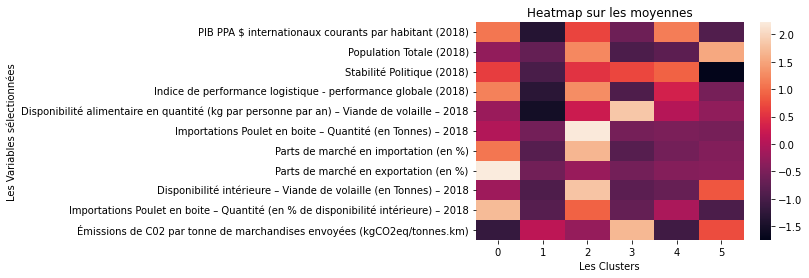

In [53]:
#Heatmap sur les clusters

#On centre et réduit les données
df_std_scale = preprocessing.StandardScaler().fit(df_moy2)
df_scaled = df_std_scale.transform(df_moy2)
df_scaled_t = df_scaled.T
sns.heatmap(df_scaled_t, yticklabels=df_simple3.iloc[:,0:11].columns.tolist(),xticklabels=[0,1,2,3,4,5])
plt.xlabel("Les Clusters")
plt.ylabel("Les Variables sélectionnées")
plt.title("Heatmap sur les moyennes")

#### Affichage des individus sur le premier plan factoriel après le K-means

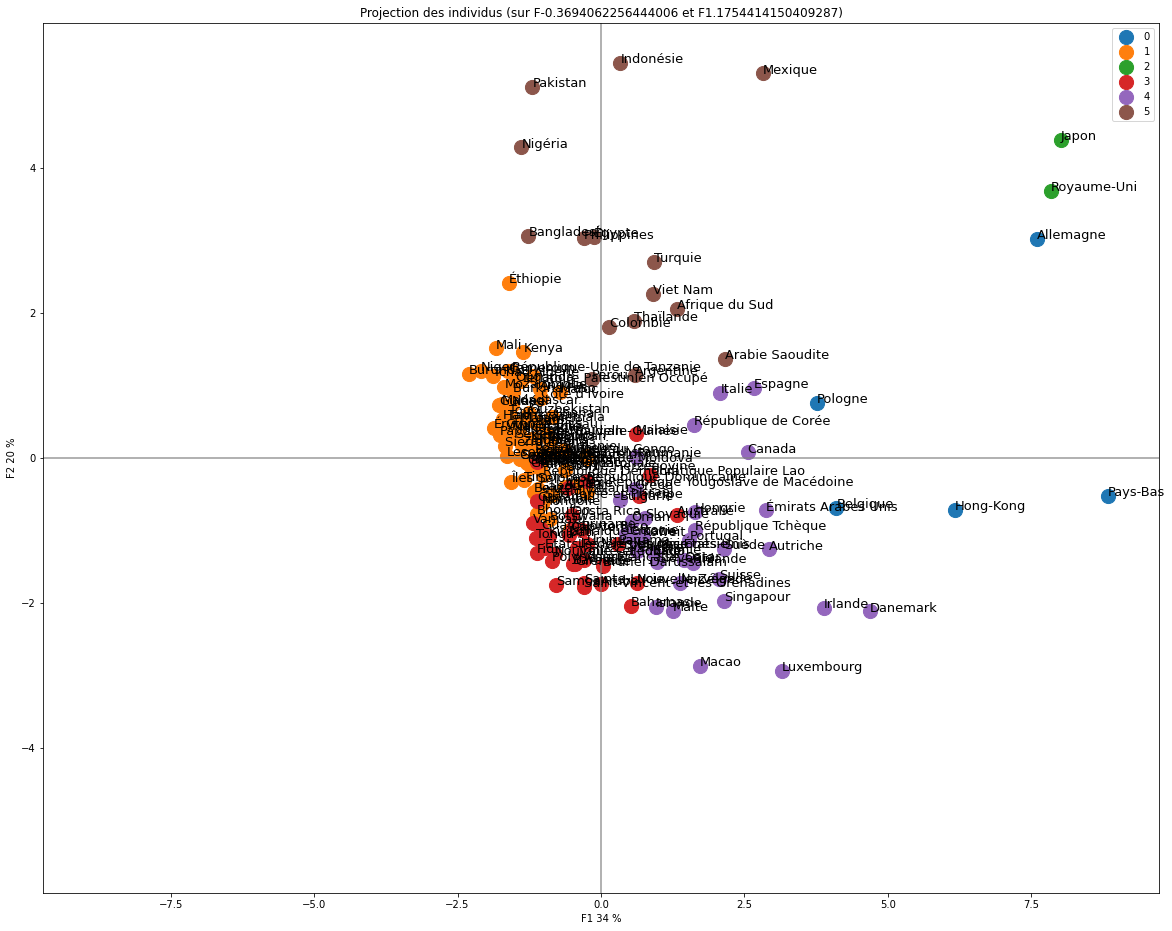

In [54]:
#On remet les pays en index
df_final3 = df_final2.copy()
df_final3.set_index('Pays (FR)', inplace=True)
#On récupère les noms des pays
names = df_final3.index
# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)


display_factorial_planes(X_reduced, [0, 1], pca, labels=names, clusters=df_final2.Cluster, figsize=(20,16), marker="o")

### Sélection des pays après la CAH et le K-means

Nous allons donc garder Allemagne, Japon, Royaume-Uni, Pays-Bas, Hong-Kong et Pologne.

In [55]:

#On crée un df sur les pays sélectionnés

df_choix = df_final2[(df_final2['Pays (FR)'] == 'Pays-Bas') | (df_final2['Pays (FR)'] == 'Pologne') | (df_final2['Pays (FR)'] == 'Hong-Kong') | (df_final2['Pays (FR)'] == 'Allemagne') | (df_final2['Pays (FR)'] == 'Japon') | (df_final2['Pays (FR)'] == 'Royaume-Uni')]
df_choix.head(6)

,Cluster,Pays (FR),PIB PPA $ internationaux courants par habitant (2018),Population Totale (2018),Stabilité Politique (2018),Indice de performance logistique - performance globale (2018),Disponibilité alimentaire en quantité (kg par personne par an) – Viande de volaille – 2018,Importations Poulet en boite – Quantité (en Tonnes) – 2018,Parts de marché en importation (en %),Parts de marché en exportation (en %),Disponibilité intérieure – Viande de volaille (en Tonnes) – 2018,Importations Poulet en boite – Quantité (en % de disponibilité intérieure) – 2018,Émissions de C02 par tonne de marchandises envoyées (kgCO2eq/tonnes.km)
55,0,Allemagne,55235.366305,82905782,0.591275,4.20,18.15,174768.0,7.729747,3.958031,1666000.0,10.490276,1462.6622
66,0,Hong-Kong,62513.955267,7451000,0.783555,3.92,39.84,92837.0,5.653200,3.710256,296000.0,31.363851,32051.2560
75,2,Japon,42116.474346,126529100,1.049072,4.03,18.78,520217.0,4.412979,0.066595,2445000.0,21.276769,32337.7170
105,0,Pays-Bas,57826.628498,17231624,0.854267,4.02,10.19,143409.0,4.365362,9.685121,234000.0,61.285897,1422.8237
121,0,Pologne,31953.035034,37974750,0.492542,3.54,30.43,10245.0,0.338802,10.112350,1247000.0,0.821572,4549.1920
157,2,Royaume-Uni,47573.488016,66460344,0.079742,3.99,33.72,366682.0,6.110898,1.547391,2364000.0,15.511083,1140.3005


C:\Users\nic_9\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 1.0, 'Heatmap sur les Pays')

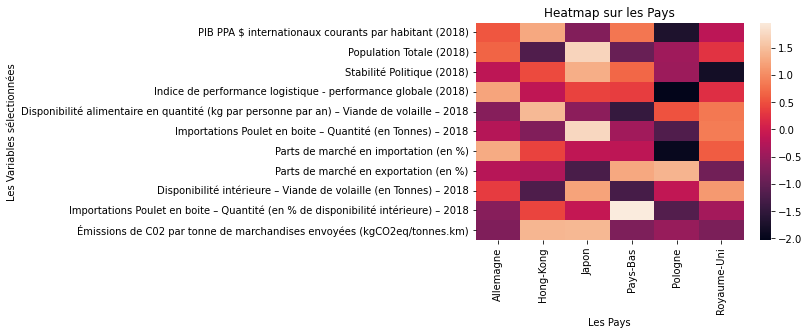

In [56]:
#### On centre et réduit les données
df_choix.set_index('Pays (FR)', inplace=True)
df_choix.drop(df_choix.columns[[0]], axis=1, inplace=True)
df_std_scale = preprocessing.StandardScaler().fit(df_choix)
df_scaled = df_std_scale.transform(df_choix)
df_scaled_t = df_scaled.T

#On fait un heatmap sur les pays
sns.heatmap(df_scaled_t, yticklabels=df_simple3.iloc[:,0:11].columns.tolist(),xticklabels=['Allemagne', 'Hong-Kong', 'Japon', 'Pays-Bas', 'Pologne', 'Royaume-Uni'])
plt.xlabel("Les Pays")
plt.ylabel("Les Variables sélectionnées")
plt.title("Heatmap sur les Pays")